In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

C:\Users\serge\AppData\Local\Temp\ipykernel_1316\3913555505.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
hh_data=pd.read_csv('data/dst-3.0_16_1_hh_database.csv',sep=';')
display(hh_data['Опыт работы'].nunique())
display(hh_data['Ищет работу на должность:'].value_counts(normalize=True))

44413

Ищет работу на должность:
Системный администратор                                                  0.069261
Инженер                                                                  0.021589
Аналитик                                                                 0.018081
Менеджер проектов                                                        0.016650
Руководитель проекта                                                     0.016047
                                                                           ...   
Системный администратор Linux, DevOps, Разработчик Golang                0.000022
Инженер КИПиА,инженер АСУТП ,видеоинженер                                0.000022
SEO-специалист | Специалист по интернет-рекламе | Интернет-маркетолог    0.000022
Специалист технических систем безопастности                              0.000022
Аналитик данных, Математик                                               0.000022
Name: proportion, Length: 14929, dtype: float64

In [24]:
def education(x):
    arg = ' '.join(x.split(' ')[:3])
    if "Высшее образование" in arg:
        return "высшее"
    if "Неоконченное высшее" in arg:
        return "неоконченное высшее"
    if "Среднее специальное образование" in arg:
        return "среднее специальное"
    if "Среднее образование" in arg:
        return "среднее"
hh_data['Образование']=hh_data['Образование и ВУЗ'].apply(education)
hh_data['Образование']=hh_data['Образование'].astype("category")

In [25]:
def gender(arg):
    if "Мужчина" in arg:
        return 'М'
    if "Женщина" in arg:
        return 'Ж'
hh_data['Пол']=hh_data['Пол, возраст'].apply(gender)
hh_data['Пол']=hh_data['Пол'].astype('category')
display(hh_data['Пол'].value_counts())

Пол
М    36211
Ж     8533
Name: count, dtype: int64

In [26]:
def age(x):
    arg=x.split(',')[1].split(' ')[2]
    return int(arg)
hh_data['Возраст']=hh_data['Пол, возраст'].apply(age)
display(hh_data['Возраст'].mean())

32.19674146254246

In [27]:
def experience(x):
    if type(x)==float:
        return np.nan
    if x=='Не указано':
        return np.nan
    arg=x.split('  ')[0].split(' ')[2:]
    if len(arg)==4:
        return int(arg[0])*12+int(arg[2])
    if len(arg)==2:
        if 'м' in arg[1]:
            return int(arg[0])
        else:
            return int(arg[0])*12
hh_data['Опыт работы (месяц)']=hh_data['Опыт работы'].apply(experience)
display(hh_data['Опыт работы (месяц)'].median())

100.0

In [28]:
million_cities = ['Новосибирск ', 'Екатеринбург ', 'Нижний Новгород ', 'Казань ', 'Челябинск ', 'Омск ', 'Самара ', 'Ростов-на-Дону ', 'Уфа ', 'Красноярск ', 'Пермь ', 'Воронеж ', 'Волгоград ' ]
def citi(x):
    arg=x.split(',')[0]
    if arg=="Москва ":
        return 'Москва'
    elif arg=="Санкт-Петербург ":
        return 'Санкт-Петербург'
    elif arg in million_cities:
        return "город-миллионник"
    else:
        return 'другие'
hh_data['Город']=hh_data['Город, переезд, командировки'].apply(citi)
hh_data['Город']=hh_data['Город'].astype('category')
display(hh_data['Город'].value_counts(normalize=True))

Город
Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: proportion, dtype: float64

In [29]:
def moving(x):
    if 'не готов к переезду' in x or 'не готова к переезду' in x:
        return False
    else:
        return True
hh_data['Готовность к переезду']=hh_data['Город, переезд, командировки'].apply(moving)
display(hh_data['Готовность к переезду'].value_counts())

Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64

In [30]:
def business_trip(x):
    arg=x.split(' , ')[-1]
    if 'командировкам' in arg:
        if 'не' in arg:
            return False
        else:
            return True
    else:
        return False
hh_data['Готовность к командировкам']=hh_data['Город, переезд, командировки'].apply(business_trip)
display(hh_data['Готовность к командировкам'].value_counts())

Готовность к командировкам
True     31640
False    13104
Name: count, dtype: int64

In [31]:
mask1=hh_data['Готовность к переезду']==True
mask2=hh_data['Готовность к командировкам']==True
answer=hh_data[mask1 & mask2]
display(answer.shape[0]/hh_data.shape[0])

0.3186572501340962

In [32]:
hh_data['полная занятость']=hh_data['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_data['частичная занятость']=hh_data['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_data['проектная работа']=hh_data['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_data['волонтёрство']=hh_data['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
hh_data['стажировка']=hh_data['Занятость'].apply(lambda x: True if 'стажировка' in x else False)

In [33]:
hh_data['полный день']=hh_data['График'].apply(lambda x: True if 'полный день' in x else False)
hh_data['сменный график']=hh_data['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_data['гибкий график']=hh_data['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_data['удалённая работа']=hh_data['График'].apply(lambda x: True if 'удалённая работа' in x else False)
hh_data['вахтовый метод']=hh_data['График'].apply(lambda x: True if 'вахтовый метод' in x else False)

In [34]:
mask3=hh_data['проектная работа']==True
mask4=hh_data['волонтёрство']==True
display(hh_data[mask3 & mask4].shape[0])
mask5=hh_data['вахтовый метод']==True
mask6=hh_data['гибкий график']==True
display(hh_data[mask6 & mask5].shape[0])

436

2311

In [35]:
exchange_rates_data=pd.read_csv('data/ExchangeRates.csv')
display(exchange_rates_data)

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,02/12/19,00:00,37.7729,0,1
5660,AZN,D,03/12/19,00:00,37.9662,0,1
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1


In [36]:
hh_data['Обновление резюме']=pd.to_datetime(hh_data['Обновление резюме']).dt.date
hh_data['Обновление резюме']=pd.to_datetime(hh_data['Обновление резюме'])
exchange_rates_data['date']=pd.to_datetime(exchange_rates_data['date'])
hh_data['Сумма ЗП']=hh_data['ЗП'].apply(lambda x: int(x.split(' ')[0]))
def valutes(x):
    arg=x.split(' ')[1]
    if arg=="грн.":
        return 'UAH'
    if arg=="USD":
        return 'USD'
    if arg=="EUR":
        return 'EUR'
    if arg=="бел.руб.":
        return 'BYN'
    if arg=="KGS":
        return 'KGS'
    if arg=="сум":
        return 'UZS'
    if arg=="AZN":
        return 'AZN'
    if arg=="KZT":
        return 'KZT'
    if arg=="руб.":
        return 'RUB'
hh_data['Валюта ЗП']=hh_data['ЗП'].apply(valutes)

C:\Users\serge\AppData\Local\Temp\ipykernel_18112\4225424429.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hh_data['Обновление резюме']=pd.to_datetime(hh_data['Обновление резюме']).dt.date
C:\Users\serge\AppData\Local\Temp\ipykernel_18112\4225424429.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates_data['date']=pd.to_datetime(exchange_rates_data['date'])


In [37]:
hh_data_merge=pd.merge(hh_data,exchange_rates_data,how='left',left_on=['Валюта ЗП','Обновление резюме'],right_on=['currency','date'])
hh_data_merge['close']=hh_data_merge['close'].fillna(1)
hh_data_merge['proportion']=hh_data_merge['proportion'].fillna(1)
hh_data_merge['ЗП (руб)']=hh_data_merge['Сумма ЗП']*hh_data_merge['close']/hh_data_merge['proportion']
display(hh_data_merge['ЗП (руб)'].median())

59000.0

In [38]:
data_project=hh_data_merge

In [39]:
display(data_project.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Пол, возраст                     44744 non-null  object        
 1   ЗП                               44744 non-null  object        
 2   Ищет работу на должность:        44744 non-null  object        
 3   Город, переезд, командировки     44744 non-null  object        
 4   Занятость                        44744 non-null  object        
 5   График                           44744 non-null  object        
 6   Опыт работы                      44576 non-null  object        
 7   Последнее/нынешнее место работы  44743 non-null  object        
 8   Последняя/нынешняя должность     44742 non-null  object        
 9   Образование и ВУЗ                44744 non-null  object        
 10  Обновление резюме                44744 non-null  datetime6

None

In [40]:
data_project=data_project.drop(['Занятость','График','Пол, возраст','Образование и ВУЗ','Город, переезд, командировки','Опыт работы','ЗП','Сумма ЗП',"Валюта ЗП","currency",'per','date','time','close','vol','proportion'],axis=1)

In [41]:
display(data_project.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  category      
 6   Пол                              44744 non-null  category      
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  category      
 10  Готовность к переезду            44744 non-null  bool     

None

In [42]:
data_project.to_csv('data/data_project.csv', sep=";", index=False)

СТАРТ ЗАДАНИЯ ПОСТРОЕНИЯ ГРАФИКОВ

In [89]:
data_project=pd.read_csv('data/data_project.csv', sep=";")

In [64]:
display(data_project)

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,False,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,False,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,False,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,False,True,False,False,False,False,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,True,False,False,True,True,True,False,False,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,False,True,False,False,False,False,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,True,False,False,False,False,False,False,False,False,20000.0


C:\Users\serge\AppData\Local\Temp\ipykernel_9648\2443423209.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Модальное значение возраста соискателей '+str(int(data_project['Возраст'].mode()))+' лет')


'Модальное значение возраста соискателей 30 лет'

'Минимальный возраст соискателя 14 лет'

'Максимальный возраст соискателя 100 лет'

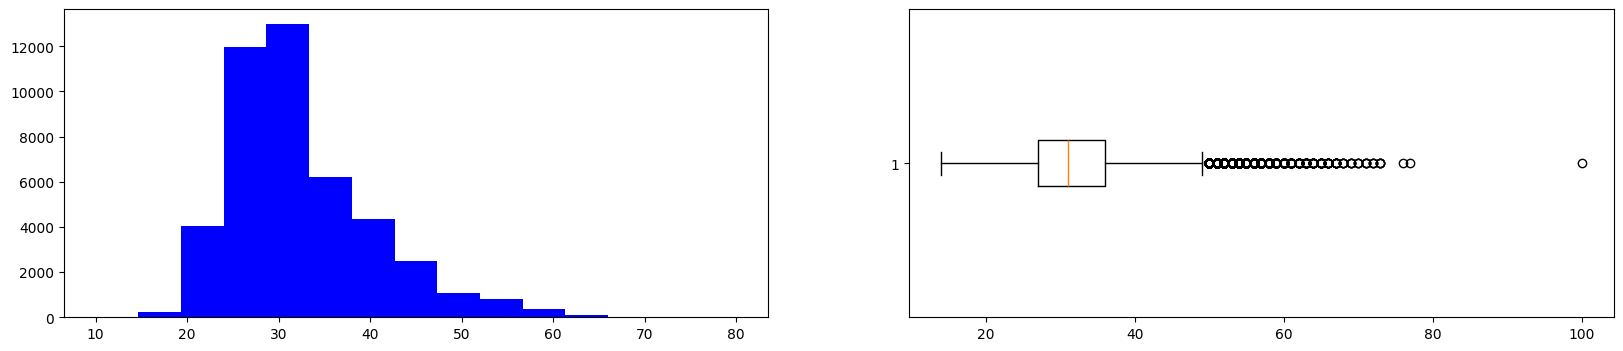

In [27]:
# Создаем координатные оси
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
# Строим графики
axes[0].hist(x=data_project['Возраст'], bins=15, color='blue',range=(10,80));
axes[1].boxplot(x=data_project['Возраст'], vert=False);
# Выводим статистические данные
display('Модальное значение возраста соискателей '+str(int(data_project['Возраст'].mode()))+' лет')
display("Минимальный возраст соискателя "+str(int(data_project['Возраст'].min()))+' лет')
display("Максимальный возраст соискателя "+str(int(data_project['Возраст'].max()))+' лет')

Согласно полученных результатов анализа мода распределения возраста соискателей это 30 лет, возраст большинства соискателей в пределах 25-35 лет, минимальное и максимальное значения признака возраста это 14 и 100 лет соответственно. Среди аномалий можно отметить резюме с указанным возрастом 100 лет, так как оно выходит далеко за пределы доверительного интервала распределения возраста и лежит обособленно от других значений.

C:\Users\serge\AppData\Local\Temp\ipykernel_9648\3916162669.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Модальное значение опыта работы соискателя '+str(int(data_project['Опыт работы (месяц)'].mode()))+' месяц')


'Модальное значение опыта работы соискателя 81 месяц'

'Минимальный опыт работы соискателя 1 месяц'

'Максимальный опыт работы соискателя 1188 месяцев'

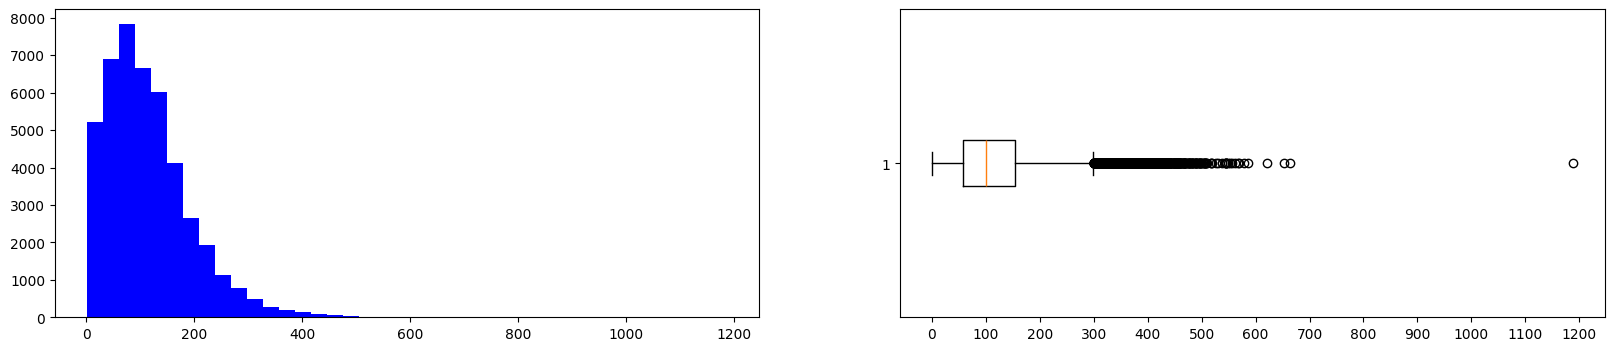

In [28]:
# Создаем координатные оси
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
axes[1].set_xticks(range(0,1300,100))
# Графа "Опыт работы (месяц)" имеет пропуски, поэтому длоя корректного построения графика необходимо это учесть:
data_project_experience=data_project[data_project['Опыт работы (месяц)']>0]
# Строим графики
axes[0].hist(x=data_project_experience['Опыт работы (месяц)'], bins=40, color='blue');
axes[1].boxplot(x=data_project_experience['Опыт работы (месяц)'], vert=False)
# Выводим статистические данные
display('Модальное значение опыта работы соискателя '+str(int(data_project['Опыт работы (месяц)'].mode()))+' месяц')
display("Минимальный опыт работы соискателя "+str(int(data_project['Опыт работы (месяц)'].min()))+' месяц')
display("Максимальный опыт работы соискателя "+str(int(data_project['Опыт работы (месяц)'].max()))+' месяцев')

Согласно полученных результатов анализа мода распределения опыта соискателей это 81 месяц, опыт большинства соискателей в пределах от 50 до 150 месяцев, минимальное и максимальное значения признака возраста это 1 и 1188 месяцев соответственно. Среди аномалий можно отметить резюме с указанным опытом работы 1188 месяцев, так как оно является явной ложью (в предыдущем задании было резюме с возрастом 100 лет, а указанный опыт работы (1188 месяцев) говорит о 99 летнем стаже, что является явным "преувеличением").

C:\Users\serge\AppData\Local\Temp\ipykernel_9648\2181514284.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display('Модальный запрос ЗП '+str(int(data_project['ЗП (руб)'].mode()))+' руб')


'Модальный запрос ЗП 50000 руб'

'Минимальный запрос ЗП 1 руб'

'Максимальный запрос ЗП 24304876 руб'

'Количество запросов ЗП свыше 1 миллиона руб: 5'

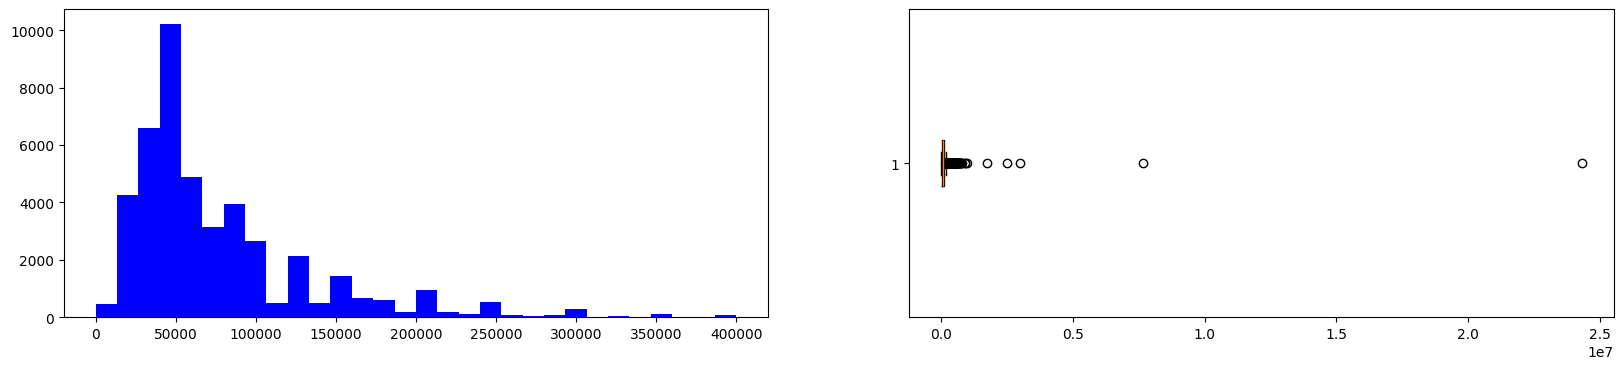

In [29]:
# Создаем координатные оси
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
# Строим графики
axes[0].hist(x=data_project['ЗП (руб)'], bins=30, color='blue', range=[0,400000]);
axes[1].boxplot(x=data_project['ЗП (руб)'], vert=False);
# Выводим статистические данные
display('Модальный запрос ЗП '+str(int(data_project['ЗП (руб)'].mode()))+' руб')
display("Минимальный запрос ЗП "+str(int(data_project['ЗП (руб)'].min()))+' руб')
display("Максимальный запрос ЗП "+str(int(data_project['ЗП (руб)'].max()))+' руб')
display('Количество запросов ЗП свыше 1 миллиона руб: '+ 
        str(int(data_project[data_project['ЗП (руб)']>1000000].shape[0])))

Согласно полученным результатам анализа мода распределения запроса ЗП от соискателей это 50000 рублей, запрос большинства соискателей в пределах 40-50 тыс. рублей, минимальное и максимальное значения запроса ЗП  это 1 рубль и 24304876 рублей соответственно. Среди аномалий можно выделить резюме с указанным запросом ЗП свыше 500000 руб (средняя ЗП высококлассного специалиста в России составляет 250000 руб).

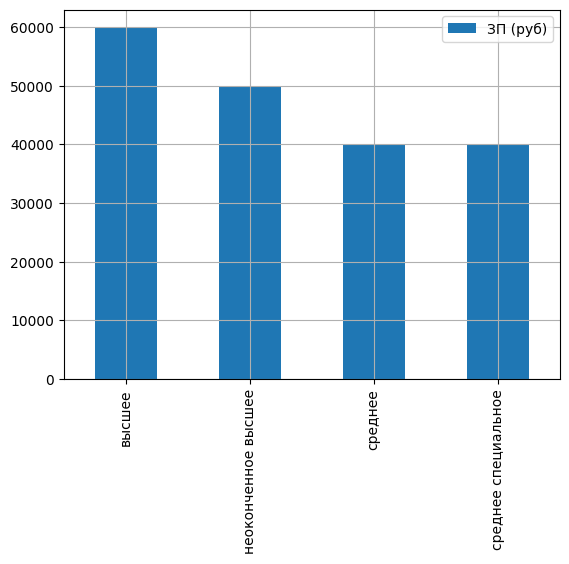

In [30]:
fig_plot=data_project[data_project['ЗП (руб)']<1000000].groupby('Образование')['ЗП (руб)'].median()
fig_plot.plot(kind='bar',x='ЗП (руб)', y='Образование', grid=True, legend=True, xlabel='');

Уровень образования, указанный в резюме - один из важных признаков для прогнозирования заработной платы при устройстве на работу. Наибольший уровень медианной желаемой заработной платы у резюме с признаком "высшее образование" (60000 руб). Минимальный уровень медианной желаемой заработной платы у резюме с признаками "среднее образование" и "среднее специальное образование"(40000 руб).

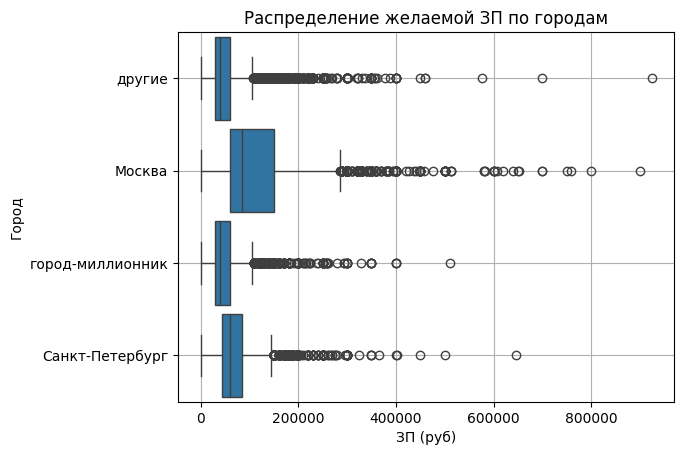

In [31]:
boxplot = sns.boxplot(
    data=data_project[data_project['ЗП (руб)']<1000000],
    x='ЗП (руб)',
    y="Город",
    orient='h',
    width=0.9
);
boxplot.set_title('Распределение желаемой ЗП по городам');
boxplot.grid()

Город, указанный в резюме - также один из важных признаков для прогнозирования заработной платы при устройстве на работу (средняя ЗП по региону накладывает свои ограничения). В Москве, в отличие от других городов, наиболее высокая медианная зарплата, а также высокий 75% квантиль по ЗП и верхний доверительный предел.  

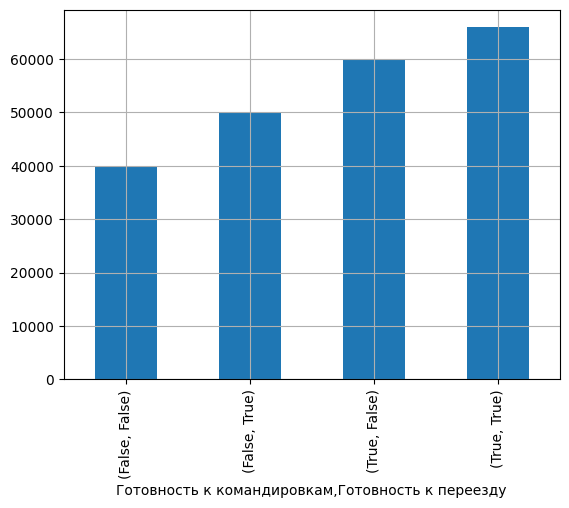

In [32]:
df_fig=data_project.groupby(["Готовность к командировкам",'Готовность к переезду'])['ЗП (руб)'].median()
df_fig.plot(kind = "bar", grid=True);

Согласно графика, наибольшая медианная желаемая заработная плата среи тех слискателей, кто готов и к командировкам и к переезду; на втором месте люди готовые к командировкам, но не готовые к переезду; на третьем месте по величине медианной заработной платы люди котовые к переездам, но не готовые к командировкам; самая низкая медианная желаемая заработная плата среди людей не готовых к переездам и командировкам.

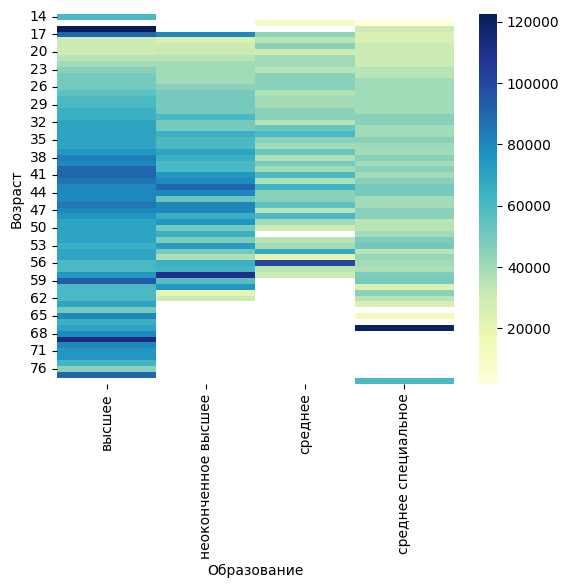

In [33]:
df_heatmap=data_project.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
)
heatmap = sns.heatmap(data=df_heatmap, cmap='YlGnBu')


Судя по тепловой карте медианная желаемая заработная плата выше в группах среднего  и неоконченного высшего образования. Также согласно графика наиболее высокие меианные желаемые заработные платы указаны у людей возраста 38-42 лет.


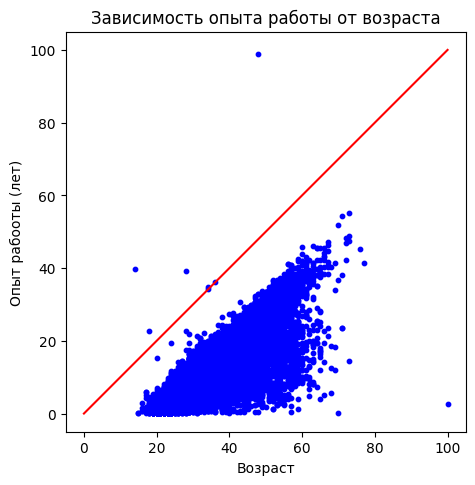

In [34]:
data_project['Опыт работы (год)']=data_project['Опыт работы (месяц)']/12
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=data_project['Возраст'], 
    y=data_project['Опыт работы (год)'], 
    marker='o',
    s=10,
    c = 'blue'
);
axes.plot([0,100], [0,100], color='red');
axes.set_xlabel('Возраст');
axes.set_ylabel('Опыт рабооты (лет)');
axes.set_title('Зависимость опыта работы от возраста');


Согласно диаграммы распределения 7 точек лежат выше прямой, проходящей через (0,0) и (100,100), что говворит о наличии в данных как минимум 7 аномалий (опыт работы больше чем вораст).

In [6]:
data_project=pd.read_csv('data/data_project.csv', sep=";")

СТАРТ ОЧИСТКИ ДАННЫХ

In [8]:
# Создаем маску на дубликаты
mask_dupl=data_project.duplicated()
# Выводим количество дубликатов 
display(data_project[mask_dupl].shape[0])
# Убираем дубликаты
data_project=data_project.drop_duplicates()

161

In [9]:
# Находим столбцы с пропущенными значениями
null_columns=data_project.isnull().mean()*100
# Выводим названия столбцов с пропущенными значениями
display(null_columns[null_columns>0])
# Выводим количество пропущенных значений в графе "Опыт работы (месяц)"
display(data_project['Опыт работы (месяц)'].isnull().value_counts())

Последнее/нынешнее место работы    0.002243
Последняя/нынешняя должность       0.004486
Опыт работы (месяц)                0.376825
dtype: float64

Опыт работы (месяц)
False    44415
True       168
Name: count, dtype: int64

In [10]:
# Находим строки с пропусками в столбцах 'Последнее/нынешнее место работы' и "Последняя/нынешняя должность"
drop_pass=data_project[data_project['Последнее/нынешнее место работы'].isnull() |
                        data_project['Последняя/нынешняя должность'].isnull()]
# Извлекаем их индексы в список
index_drop=list(drop_pass.index)
# Удаляем строки с этими индексами
data_project=data_project.drop(index=index_drop)
# Заполняем пропуски в графе "Опыт работы (месяц)" медианным значением
data_project['Опыт работы (месяц)']=data_project['Опыт работы (месяц)'].fillna(data_project['Опыт работы (месяц)'].median())
# Выведем результирующее среднее значение в графе "Опыт работы (месяц)"
print(round(data_project['Опыт работы (месяц)'].mean()))

114


In [11]:
# Находим резюме с ЗП выше 1 миллиона рублей и ниже 1 тысячи рублей.
condition_million=data_project['ЗП (руб)']>1000000
condition_thousand=data_project['ЗП (руб)']<1000
anomaly_salary=data_project[condition_thousand | condition_million]
# Выводим количество аномальных по ЗП резюме
display(anomaly_salary.shape[0])
# Находим индексы этих резюме
index_anomaly_salary=list(anomaly_salary.index)
# Удаляем строки с этими индексами
data_project=data_project.drop(index=index_anomaly_salary)


89

In [12]:
# Создаем Series с опытом работы в годах
experience_work=round(data_project["Опыт работы (месяц)"]/12, 2)
# Находим резюме с возрастом меньше опыта работы в годах
unrealistic_resumes=data_project[data_project['Возраст']<experience_work]
# Находим их индексы и удаляем
index_unrealistic_resumes=list(unrealistic_resumes.index)
data_project=data_project.drop(index=index_unrealistic_resumes)

3


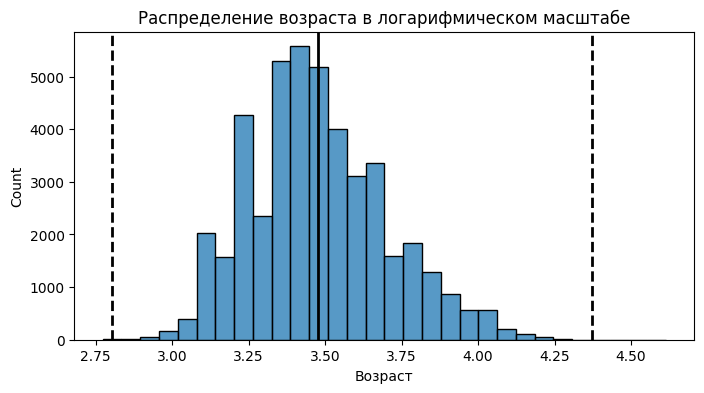

In [21]:
# Строим распределение признака "Возраст" в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data_project['Возраст'] + 1)
age_hist = sns.histplot(log_age, bins=30, ax=ax)
age_hist.axvline(log_age.mean(), color='k', lw=2)
age_hist.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
age_hist.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
age_hist.set_title('Распределение возраста в логарифмическом масштабе');

# Создаем функцию для расчета "сигм"
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
# Находим количество отклонений по методу "сигм"
outliers, cleaned_data = outliers_z_score_mod(data_project, 'Возраст', left=3,  right=4, log_scale=True)
print(outliers.shape[0])